In [1]:
# importing the necessary libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import HTML
import geopandas as gpd

In [2]:
# paths to the files
forest_masks = {
    2001: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2001_masked_forest.tif",
    2008: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2008_masked_forest.tif",
    2016: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2016_masked_forest.tif",
    2024: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2024_masked_forest.tif"
}

# shapefile path
shapefile_path = "/shared_space/BrazilSPEI/Maranhao_boundaries_EPSG/maranhao_boundary.shp"

# load shapefile
ma = gpd.read_file(shapefile_path)

In [3]:
# using a clean 2-color scheme
cmap = ListedColormap(['#f0f0f0', '#006400'])

Plotting forest maps with boundary...


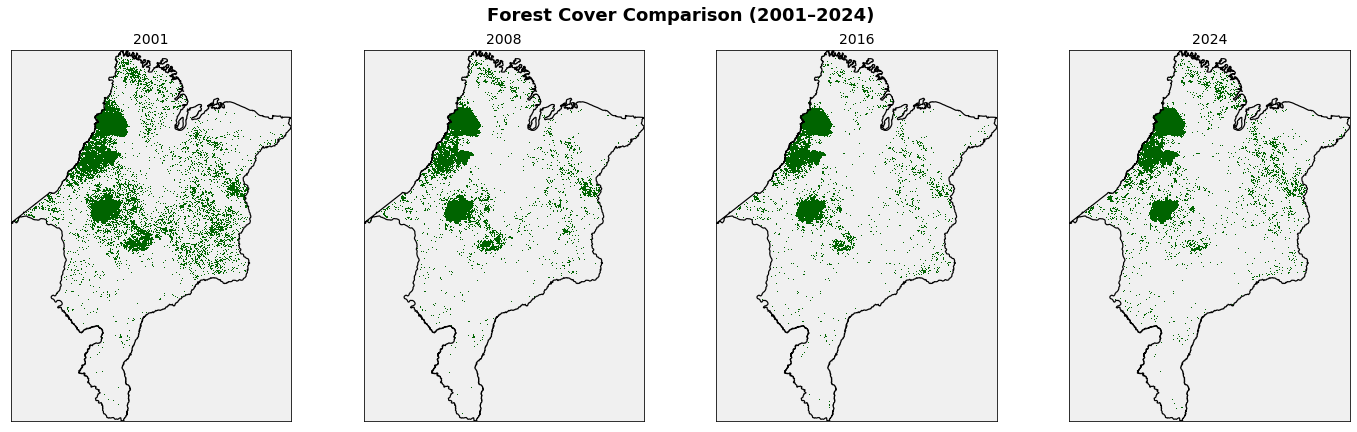

Saved image to: forest_cover_comparison.png


In [4]:
fig, ax_grid = plt.subplots(1, 4, figsize=(20, 6))
axes = ax_grid.ravel()

print("Plotting forest maps with boundary...")

for ax, (year, path) in zip(axes, sorted(forest_masks.items())):
    
    # loading the raster
    with rasterio.open(path) as src:
        mask = src.read(1).astype(float)
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
        raster_crs = src.crs

    # reprojecting the boundary
    if ma.crs != raster_crs:
        ma = ma.to_crs(raster_crs)

    # plotting raster
    ax.imshow(
        mask, cmap=cmap, vmin=0, vmax=1,
        extent=extent, interpolation='nearest'
    )

    # plotting boundary 
    ma.boundary.plot(ax=ax, color="black", linewidth=1.2)

    ax.set_title(f"{year}", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(
    wspace=0.001,
    hspace=0,
    left=0.01,
    right=0.99,
    top=0.88,
    bottom=0.02
)

fig.suptitle("Forest Cover Comparison (2001–2024)",
             fontsize=18, fontweight='bold', y=0.98)

# saving the figure
output_path = "forest_cover_comparison.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Saved image to: {output_path}")

### Animated GIF showing the rate of deforestation

In [5]:
# importing the necessary libraries
import glob
import os
import rasterio
from rasterio.mask import mask
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML
from matplotlib.patches import Patch

In [6]:
# defining the paths
shapefile_path = "/shared_space/BrazilSPEI/Maranhao_boundaries_EPSG/maranhao_boundary.shp"
forest_dir = "/shared_space/BrazilSPEI/MODIS/Reclass_Data"
output_gif = "maranhao_forest_animation.gif"

In [7]:
# abimation settings
fps = 2                # frames per second or the speed
dpi = 150              # resolution
interval = 600         # milliseconds per frame

In [8]:
# loading the Maranhao boundary
print("Loading Maranhão shapefile...")
ma = gpd.read_file(shapefile_path)
ma.crs = "EPSG:4326"
print(f"Shapefile loaded: {ma.crs}")

Loading Maranhão shapefile...
Shapefile loaded: EPSG:4326


In [9]:
# loading all the forest rasters
print("Loading forest cover rasters...")
forest_paths = sorted(glob.glob(os.path.join(forest_dir, "*_forest.tif")))

if len(forest_paths) == 0:
    print(f"ERROR: No forest rasters found in {forest_dir}")
    exit(1)

print(f"Found {len(forest_paths)} forest rasters")

Loading forest cover rasters...
Found 24 forest rasters


In [10]:
# extracting the years from filenames
years = []
for path in forest_paths:
    fname = os.path.basename(path)
    # extracting 4-digit year
    digits = ''.join(filter(str.isdigit, fname))
    if len(digits) >= 4:
        year = int(digits[-4:])  # Get last 4 digits
        years.append(year)
    else:
        years.append(None)

In [11]:
# loading raster data
forest_arrays = []
extent = None
raster_crs = None

for i, path in enumerate(forest_paths):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(float)
        forest_arrays.append(arr)
        
        if extent is None:
            bounds = src.bounds
            extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
            raster_crs = src.crs
        
        # Calculate forest area for this year
        forest_pixels = np.sum(arr == 1)
        forest_area_km2 = forest_pixels * 0.25  # Each pixel is 500m x 500m = 0.25 km²
        
        if years[i]:
            print(f"  Year {years[i]}: {forest_area_km2:,.0f} km² forest")

print(f"Loaded {len(forest_arrays)} rasters")
print(f"CRS: {raster_crs}")
print(f"Shape: {forest_arrays[0].shape}")
print(f"Extent: {extent}")

  Year 2001: 60,612 km² forest
  Year 2002: 54,437 km² forest
  Year 2003: 49,906 km² forest
  Year 2004: 45,960 km² forest
  Year 2005: 44,393 km² forest
  Year 2006: 40,937 km² forest
  Year 2007: 39,440 km² forest
  Year 2008: 34,968 km² forest
  Year 2009: 34,334 km² forest
  Year 2010: 34,740 km² forest
  Year 2011: 36,248 km² forest
  Year 2012: 35,394 km² forest
  Year 2013: 32,732 km² forest
  Year 2014: 32,719 km² forest
  Year 2015: 33,545 km² forest
  Year 2016: 30,428 km² forest
  Year 2017: 32,213 km² forest
  Year 2018: 32,915 km² forest
  Year 2019: 36,080 km² forest
  Year 2020: 37,488 km² forest
  Year 2021: 37,200 km² forest
  Year 2022: 37,682 km² forest
  Year 2023: 36,463 km² forest
  Year 2024: 36,137 km² forest
Loaded 24 rasters
CRS: EPSG:4326
Shape: (2052, 1550)
Extent: (-48.75606204558703, -41.79411859366074, -10.263252121065534, -1.0465373059992427)


In [12]:
# reprojecting the shapefile if needed
if raster_crs != ma.crs:
    print(f"\nReprojecting shapefile from {ma.crs} to {raster_crs}")
    ma = ma.to_crs(raster_crs)

In [13]:
# creating the animation
print("Creating animation...")

# color map: gray for non-forest (0), dark green for forest (1)
cmap = ListedColormap(["#e6e6e6", "#006400"])

# creating the figure
fig, ax = plt.subplots(figsize=(8, 10))
fig.patch.set_facecolor('white')

# displaying first frame
im = ax.imshow(
    forest_arrays[0], 
    cmap=cmap, 
    vmin=0, 
    vmax=1, 
    extent=extent,
    interpolation='nearest'
)

title = ax.text(
    0.5, 1.07,
    f"Maranhão Forest Cover — {years[0]}",
    transform=ax.transAxes,
    ha="center", 
    fontsize=20, 
    fontweight="bold"
)

forest_pixels_0 = np.sum(forest_arrays[0] == 1)
forest_area_0 = forest_pixels_0 * 0.25
area_text = ax.text(
    0.5, 1.02,
    f"Forest Area: {forest_area_0:,.0f} km²",
    transform=ax.transAxes,
    ha="center",
    fontsize=14,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# drawing the state boundary
ma.boundary.plot(ax=ax, color="black", linewidth=1.5)

# setting the map extent and setting axes
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# adding legend
legend_elements = [
    Patch(facecolor='#006400', label='Forest'),
    Patch(facecolor='#e6e6e6', label='Non-forest')
]
ax.legend(
    handles=legend_elements, 
    loc='lower right',
    frameon=True,
    fancybox=True,
    shadow=True
)

# updating the function
def update(i):
    # updating the raster
    im.set_data(forest_arrays[i])
    
    # updating the title
    title.set_text(f"Maranhão Forest Cover — {years[i]}")
    
    # updating the area text
    forest_pixels = np.sum(forest_arrays[i] == 1)
    forest_area = forest_pixels * 0.25
    area_text.set_text(f"Forest Area: {forest_area:,.0f} km²")
    
    return [im, title, area_text]

print(f"Generating animation with {len(forest_arrays)} frames...")

anim = FuncAnimation(
    fig, 
    update,
    frames=len(forest_arrays),
    interval=interval,
    blit=True,
    repeat=True
)

# saving it as a gif
anim.save(
    output_gif, 
    writer='pillow', 
    fps=fps, 
    dpi=dpi
)

print(f"Output file: {output_gif}")
print(f"Duration: ~{len(forest_arrays) / fps:.1f} seconds")
print(f"Resolution: {dpi} DPI")

plt.close()


HTML(anim.to_html5_video())

Creating animation...
Generating animation with 24 frames...
Output file: maranhao_forest_animation.gif
Duration: ~12.0 seconds
Resolution: 150 DPI
